# Grid search proportion of synthetic data to add in the training.

Usually synthetic data is added in the same proportion as real data in the training. In other words, 1 sample over 2 in the training set is a synthetic one.  
In this notebook we check that this proportion is good for the project.

In [15]:
import pycaret.classification as pc
import pycaret.regression as pr
import pandas as pd
import numpy as np
from collections import Counter
from collections import OrderedDict
import copy
import json
import os
import copy
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import os.path
from os import path as pa
from preferencefig import *

In [30]:
np.linspace(0.1,0.6,6)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [48]:
path_list_data ='../Results/Result_7/Data/List_data_preprocessing2.csv' # Where to find the list of selected datasets, result of N2
directory_data = '../T_Data/'
list_data = pd.read_csv(path_list_data,index_col=[0])
proportion = np.linspace(0.1,0.6,6)
num_try = 3
result = np.zeros((len(list_data),len(proportion),5,num_try))
diff = True
i = 0
list_not_work = []
for path in tqdm(list_data['Dataset'][:5]) : 
    real_data = pd.read_csv(directory_data+path+'/Data/'+path+'.csv',index_col=[0])
    synthetic_data = pd.read_csv(directory_data+path+'/Data/'+path+'.csv',index_col=[0])
    for j,prop in enumerate(proportion) :
        for k,test in enumerate(range(num_try)) : 
            X_train, X_test = train_test_split(real_data, test_size=0.33)
            synt_data = synthetic_data.sample(int(prop/(1-prop)*len(X_train)))
            training_set = pd.concat([X_train,synt_data])
            f = open(directory_data+'/'+path+'/'+'dict_info.json') 
            dict_info=json.load(f)
            f.close()

            l = pc.setup(training_set, 
                target =dict_info['target'],
                test_data = X_test,fold_strategy = "kfold",
                fold=20,
                numeric_features = dict_info['numeric_features'],
                categorical_features = dict_info['categorical_features'],
                ignore_features = dict_info['ignore_features'],
                normalize = True,
                normalize_method = "zscore",
                silent = True, verbose = False) 
            r1 = pc.compare_models(n_select=15)
            l = pc.pull()
            if not l.empty : 
                result_add = l.iloc[0][['Accuracy','AUC','Recall','Prec.','F1']]
            else : 
                diff=False

            l = pc.setup(X_train, 
                target =dict_info['target'],
                test_data = X_test,fold_strategy = "kfold",
                fold=20,
                numeric_features = dict_info['numeric_features'],
                categorical_features = dict_info['categorical_features'],
                ignore_features = dict_info['ignore_features'],
                normalize = True,
                normalize_method = "zscore",
                silent = True, verbose = False) 
            r1 = pc.compare_models(n_select=15)
            l = pc.pull()
            if not l.empty : 
                result_baseline = l.iloc[0][['Accuracy','AUC','Recall','Prec.','F1']]
            else : 
                diff=False
            if not diff : 
                result[i,j,:,k] = (result_add-result_baseline).values
            else :
                list_not_work.append(i)
                diff = True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9250,0.0000,0.3500,0.3500,0.3500,nan,0.1000,0.0020
et,Extra Trees Classifier,0.9000,0.2000,0.3500,0.3250,0.3333,nan,0.1000,0.0235
lr,Logistic Regression,0.8750,0.2000,0.3000,0.3000,0.3000,nan,0.1000,0.0185
knn,K Neighbors Classifier,0.8750,0.1500,0.2750,0.3000,0.2833,nan,0.1000,0.0120
rf,Random Forest Classifier,0.8750,0.2000,0.3000,0.3000,0.3000,nan,0.1500,0.0425
dt,Decision Tree Classifier,0.8500,0.1750,0.3000,0.3000,0.3000,nan,0.1500,0.0040
qda,Quadratic Discriminant Analysis,0.8500,0.1500,0.3000,0.3000,0.3000,nan,0.1000,0.0020
ada,Ada Boost Classifier,0.8500,0.2000,0.3000,0.3000,0.3000,nan,0.1500,0.0100
lda,Linear Discriminant Analysis,0.8500,0.2000,0.3000,0.3000,0.3000,nan,0.1000,0.0020
gbc,Gradient Boosting Classifier,0.8250,0.2000,0.2500,0.2500,0.2500,nan,0.1000,0.0075


In [49]:
agg_result = result.mean(axis=3)

In [62]:
agg_result[0].T.shape

(5, 6)

In [64]:
agg_result[0].T

array([[ 1.66666667e-02, -1.66666667e-02,  8.33333333e-03,
         2.77666667e-02,  5.55333333e-02,  3.19333333e-02],
       [-1.66666667e-02,  1.16666667e-01,  3.25000000e-01,
         3.00000000e-01,  6.25000000e-01,  7.37500000e-01],
       [ 1.85037171e-17,  2.50000000e-02,  1.75000000e-01,
         2.08333333e-01,  3.41666667e-01,  4.19433333e-01],
       [ 1.85037171e-17,  2.50000000e-02,  1.50000000e-01,
         2.08333333e-01,  3.36100000e-01,  4.27766667e-01],
       [ 1.85037171e-17,  2.22333333e-02,  1.61066667e-01,
         2.11133333e-01,  3.41133333e-01,  4.21100000e-01]])

In [55]:
agg_result[0,:,0]

array([ 0.01666667, -0.01666667,  0.00833333,  0.02776667,  0.05553333,
        0.03193333])

In [59]:
agg_result[0,:,4]

array([1.85037171e-17, 2.22333333e-02, 1.61066667e-01, 2.11133333e-01,
       3.41133333e-01, 4.21100000e-01])

In [53]:
agg_result = result.mean(axis=3)
result_plot = []
for i in range(5) : 
    result_plot.append(1*(agg_result[:,:,i]>0).sum(axis=0)/len(agg_result))

In [54]:
result_plot

[array([0.00657895, 0.        , 0.00657895, 0.00657895, 0.00657895,
        0.00657895]),
 array([0.        , 0.00657895, 0.00657895, 0.00657895, 0.00657895,
        0.00657895]),
 array([0.00657895, 0.00657895, 0.00657895, 0.00657895, 0.00657895,
        0.00657895]),
 array([0.00657895, 0.00657895, 0.00657895, 0.00657895, 0.00657895,
        0.00657895]),
 array([0.00657895, 0.00657895, 0.00657895, 0.00657895, 0.00657895,
        0.00657895])]

In [19]:
proportion[:5]

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [17]:
agg_result[0,:5,i]

array([0.01666667, 0.04166667, 0.11666667, 0.04166667, 0.10556667])

In [ ]:
result = np.zeros((len(list_data),len(proportion),5,num_try))

In [23]:
plot_result_acc = 1*(agg_result[:,:,0]>0).sum(axis=0)

In [27]:
1*(agg_result[:,:,0]>0)

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
plot_result_acc

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

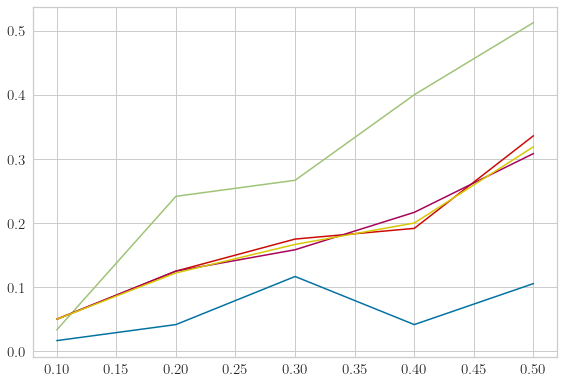

In [20]:
fig,ax = plt.subplots()
for i in range(5):
    ax.plot(proportion[:5],agg_result[0,:5,i])
    

In [2]:
sage_table = pd.read_csv('../Results/Result_02/Data/Table_balance.csv',index_col=[0])
list_data_imp = sage_table[(sage_table['Number rows']>200)&(sage_table['Number rows']<1000)]['Data']
directory = '../T_Data/'
mod_notwork = []
paths = os.listdir(directory)
dict_prov = {}
dict_data = {}
dict_prov['dict_info'] = {}
dict_prov['metadata'] = {}
dict_prov['Real data'] = {}

table_accuracy = pd.DataFrame()
table_auc = pd.DataFrame()
table_f1 = pd.DataFrame()
table_recall = pd.DataFrame()
table_precision = pd.DataFrame()


prop_synt_data=np.round(np.linspace(0.1,1,10),2)
key1 = ['X_train','X_test','Dataframe_0','GC'] #'TVAE','TGAN','GC','CGAN']
key_synt = ['GC'] #'TVAE','TGAN','GC','CGAN']
key2 = list(prop_synt_data)
key2.append('Full')
key3 = ['synt_data','Dataframe','sdv_eval']

pp = 0
for path in tqdm(list_data_imp) : 
    #if (not pa.exists(directory+path+'/'+'Result.json')) and path!='Engine1_1' :
        #new_list_data.append(path)
        #print(new_list_data)
        dict_prov2 = {}
        dict_prov1 = {}
        dict_final = {}
        for key in key3 : 
            dict_prov2[key] = {}
        for key in key2 :
            dict_prov1[key] = copy.deepcopy(dict_prov2)
        for key in key1 : 
            dict_final[key] = copy.deepcopy(dict_prov1)
        
        X = pd.read_csv(directory+path+'/Data/'+path+'.csv',index_col=[0])
        f = open(directory+'/'+path+'/'+'metadata.json') 
        metadata=json.load(f)
        f.close()

        f = open(directory+'/'+path+'/'+'dict_info.json') 
        dict_info=json.load(f)
        f.close()
        
        mask = np.random.permutation(len(X))
        X_train = X.iloc[mask[:int(0.7*len(X))]]
        X_test = X.iloc[mask[int(0.7*len(X)):]]

        l = pc.setup(X_train, 
                    target = dict_info['target'],
                    test_data = X_test,fold_strategy = "kfold",
                    fold=20,
                    numeric_features = dict_info['numeric_features'],
                    categorical_features = dict_info['categorical_features'],
                    ignore_features = dict_info['ignore_features'],
                    normalize = True,
                    normalize_method = "zscore",
                    silent = True, verbose = False) 
        r1 = pc.compare_models(n_select=15)
        l = pc.pull()
        if not l.empty : 
            l_prov = l[['Accuracy','AUC','Recall','Prec.','F1']]
            l_prov.replace(np.inf,99,inplace=True)
            l_prov.replace(-np.inf,-99,inplace=True)
            l_prov.replace(np.nan,-1,inplace=True)
            l_prov.fillna(-1,inplace=True)
            dict_final['Dataframe_0'] = copy.deepcopy(l_prov.to_json())
            max_val_baseline = l_prov.max().values
        else : 
            mod_notwork.append(path)

        dict_final['X_train'] = copy.deepcopy(X_train.to_json())
        dict_final['X_test'] = copy.deepcopy(X_test.to_json())
        if 'Balance' in dict_info['goal'] :
            pro = {}
            pro['Balance'] = {} 
            dict_final['GC'].update(pro)
            
        for key22 in key1 :
            if key22 not in ['X_train','X_test','Dataframe_0'] :  
                X_synt = pd.read_csv(directory+path+'/Data/'+path+'_'+key22+'.csv',index_col=[0])
                if 'Unnamed: 0' in list(X_synt.columns):
                    X_synt = X_synt.drop('Unnamed: 0',axis=1)
                    X_synt.to_csv(directory+'/'+path+'/'+path+'_'+key22+'.csv')
                
                prov_acc = []
                prov_auc = []
                prov_f1 = []
                prov_precision = []
                prov_recall = []
                prov_acc.append(path)
                prov_auc.append(path)
                prov_f1.append(path)
                prov_precision.append(path)
                prov_recall.append(path)
                for key33 in dict_final[key22] :
                    if key33 not in ['Full','Balance'] : 
                        mask2 = np.random.permutation(len(X_synt))
                        prov2 = X_synt.iloc[mask2[:int(key33*len(X_synt))]]
                        X_train2 = pd.concat([X_train,prov2]) 
                    else :
                        prov2 = X_synt
                        if key33 == 'Full' :
                            X_train2 = X_synt
                        else :
                            t_v,t_c = np.unique(X_train[dict_info['target']],return_counts=True)
                            mean = len(X_train)/len(t_v)
                            vv = np.abs(t_c-mean)/mean
                            p = pd.DataFrame(columns = X_train.columns)
                            for ind,valu in enumerate(t_v) : 
                                if (vv[ind]>0.5) and (t_c[ind]-mean<0) :
                                    b_data = X_synt.loc[X_synt[dict_info['target']]==valu]
                                    p = pd.concat([p,b_data])
                            prov2 = p
                            X_train2 = pd.concat([X_train,p])
                    
                    l = pc.setup(X_train2, 
                        target = dict_info['target'],
                        test_data = X_test,fold_strategy = "kfold",
                        fold=20,
                        numeric_features = dict_info['numeric_features'],
                        categorical_features = dict_info['categorical_features'],
                        ignore_features = dict_info['ignore_features'],
                        normalize = True,
                        normalize_method = "zscore",
                        silent = True, verbose = False) 
                    r1 = pc.compare_models(n_select=15)
                    l = pc.pull()
                    if not l.empty : 
                        l_prov = l[['Accuracy','AUC','Recall','Prec.','F1']]
                        l_prov.replace(np.inf,99,inplace=True)
                        l_prov.replace(-np.inf,-99,inplace=True)
                        l_prov.replace(np.nan,-1,inplace=True)
                        l_prov.fillna(-1,inplace=True)
                        dict_final[key22][key33]['Dataframe'] = copy.deepcopy(l_prov.to_json())
                        max_val = l_prov.max().values
                    imp = max_val-max_val_baseline
                    prov_acc.append(imp[0])
                    prov_auc.append(imp[1])
                    prov_recall.append(imp[2])
                    prov_precision.append(imp[3])
                    prov_f1.append(imp[4])
                    dict_final[key22][key33]['synt_data'] = copy.deepcopy(prov2.to_json())
                table_accuracy.append({'Data':prov_acc[0],'10%':prov_acc[1],
'20%':prov_acc[2],'30%':prov_acc[3],'40%':prov_acc[4],'50%':prov_acc[5],
'60%':prov_acc[6],'70%':prov_acc[7],'80%':prov_acc[8],'90%':prov_acc[9],'100%':prov_acc[10]},ignore_index=True)
                
                table_auc.append({'Data':prov_auc[0],'10%':prov_auc[1],
'20%':prov_auc[2],'30%':prov_auc[3],'40%':prov_auc[4],'50%':prov_auc[5],
'60%':prov_auc[6],'70%':prov_auc[7],'80%':prov_auc[8],'90%':prov_auc[9],'100%':prov_auc[10]},ignore_index=True)

                table_precision.append({'Data':prov_precision[0],'10%':prov_precision[1],
'20%':prov_precision[2],'30%':prov_precision[3],'40%':prov_precision[4],'50%':prov_precision[5],
'60%':prov_precision[6],'70%':prov_precision[7],'80%':prov_precision[8],'90%':prov_precision[9],'100%':prov_precision[10]},ignore_index=True)

                table_f1.append({'Data':prov_f1[0],'10%':prov_f1[1],
'20%':prov_f1[2],'30%':prov_f1[3],'40%':prov_f1[4],'50%':prov_f1[5],
'60%':prov_f1[6],'70%':prov_f1[7],'80%':prov_f1[8],'90%':prov_f1[9],'100%':prov_f1[10]},ignore_index=True)

                table_recall.append({'Data':prov_recall[0],'10%':prov_recall[1],
'20%':prov_recall[2],'30%':prov_recall[3],'40%':prov_recall[4],'50%':prov_recall[5],
'60%':prov_recall[6],'70%':prov_recall[7],'80%':prov_recall[8],'90%':prov_recall[9],'100%':prov_recall[10]},ignore_index=True)
        with open(directory+path+'/Result_2.json', 'w') as fp:
                json.dump(dict_final, fp)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6036,0.7224,0.5827,0.6495,0.5987,0.3396,0.3659,0.0045
lda,Linear Discriminant Analysis,0.5900,0.7127,0.5711,0.6289,0.5843,0.3146,0.3377,0.0850
qda,Quadratic Discriminant Analysis,0.5714,0.6806,0.5645,0.5998,0.5686,0.2731,0.2897,0.0755
ridge,Ridge Classifier,0.5659,0.0000,0.5549,0.6187,0.5609,0.3004,0.3305,0.0765
lightgbm,Light Gradient Boosting Machine,0.5132,0.6305,0.5185,0.5642,0.5058,0.2119,0.2322,0.0985
ada,Ada Boost Classifier,0.4795,0.5892,0.4837,0.4973,0.4533,0.1456,0.1618,0.0055
dummy,Dummy Classifier,0.4545,0.4750,0.3667,0.2400,0.3098,0.0000,0.0000,0.0025


In [31]:
x = np.linspace(0.1,1,10)
x = 100*(x/(x+0.7))
print(x)

[12.5        22.22222222 30.         36.36363636 41.66666667 46.15384615
 50.         53.33333333 56.25       58.82352941]


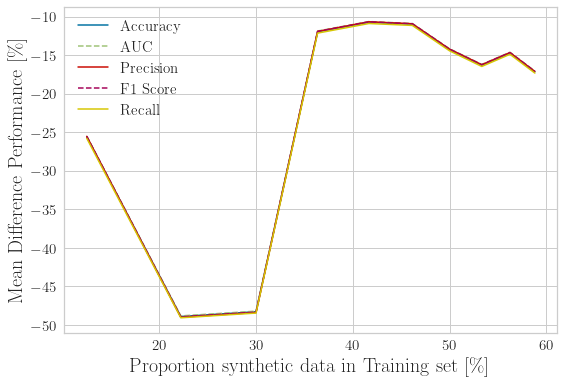

In [49]:
import preferencefig
fig,ax = plt.subplots()
ax.plot(x,100*t_acc.mean(),'-',label='Accuracy')
ax.plot(x,100*t_auc.mean(),'--',label='AUC')
ax.plot(x,100*t_pr.mean(),'-',label='Precision')
ax.plot(x,100*t_f1.mean(),'--',label='F1 Score')
ax.plot(x,100*t_r.mean(),'-',label='Recall')
ax.legend()
ax.set_xlabel('Proportion synthetic data in Training set [$\\%$]')
ax.set_ylabel('Mean Difference Performance [$\\%$]')
fig.savefig('../Results/Result_03/Figures/Grid_search.jpeg',dpi=250)


In [38]:
display(t_auc)

,Data,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,dresses-sales_2,0.1244,-0.1230,-0.1230,0.2879,0.2853,0.2816,0.2526,0.2444,0.2624,0.2329
0,fri_c3_250_50_1,-0.2471,-0.4801,-0.4739,-0.1109,-0.0985,-0.1010,-0.1338,-0.1542,-0.1384,-0.1628
0,fri_c1_500_5_1,-0.2904,-0.5234,-0.5172,-0.1542,-0.1418,-0.1443,-0.1771,-0.1975,-0.1817,-0.2061
0,fri_c2_250_50_1,-0.2270,-0.4600,-0.4538,-0.0908,-0.0784,-0.0809,-0.1137,-0.1341,-0.1183,-0.1427
0,Australian_1,-0.2699,-0.5029,-0.4967,-0.1337,-0.1213,-0.1238,-0.1566,-0.1770,-0.1612,-0.1856
...,...,...,...,...,...,...,...,...,...,...,...
0,rmftsa_ladata_1,-0.2778,-0.5108,-0.5046,-0.1416,-0.1292,-0.1317,-0.1645,-0.1849,-0.1691,-0.1935
0,chscase_census6_1,-0.0214,-0.2544,-0.2482,0.1148,0.1272,0.1247,0.0919,0.0715,0.0873,0.0629
0,kc2_1,-0.2468,-0.4798,-0.4736,-0.1106,-0.0982,-0.1007,-0.1335,-0.1539,-0.1381,-0.1625
0,diggle_table_a2_1,-0.3964,-0.6294,-0.6232,-0.2602,-0.2478,-0.2503,-0.2831,-0.3035,-0.2877,-0.3121


In [37]:
display(t_acc)

,Data,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,dresses-sales_2,-0.0054,-0.2384,-0.2322,0.1308,0.1432,0.1407,0.1079,0.0875,0.1033,0.0789
0,fri_c3_250_50_1,-0.2471,-0.4801,-0.4739,-0.1109,-0.0985,-0.1010,-0.1338,-0.1542,-0.1384,-0.1628
0,fri_c1_500_5_1,-0.2904,-0.5234,-0.5172,-0.1542,-0.1418,-0.1443,-0.1771,-0.1975,-0.1817,-0.2061
0,fri_c2_250_50_1,-0.2270,-0.4600,-0.4538,-0.0908,-0.0784,-0.0809,-0.1137,-0.1341,-0.1183,-0.1427
0,Australian_1,-0.2699,-0.5029,-0.4967,-0.1337,-0.1213,-0.1238,-0.1566,-0.1770,-0.1612,-0.1856
...,...,...,...,...,...,...,...,...,...,...,...
0,rmftsa_ladata_1,-0.2778,-0.5108,-0.5046,-0.1416,-0.1292,-0.1317,-0.1645,-0.1849,-0.1691,-0.1935
0,chscase_census6_1,-0.0214,-0.2544,-0.2482,0.1148,0.1272,0.1247,0.0919,0.0715,0.0873,0.0629
0,kc2_1,-0.2468,-0.4798,-0.4736,-0.1106,-0.0982,-0.1007,-0.1335,-0.1539,-0.1381,-0.1625
0,diggle_table_a2_1,-0.3964,-0.6294,-0.6232,-0.2602,-0.2478,-0.2503,-0.2831,-0.3035,-0.2877,-0.3121


In [24]:
i = 0
j=0
for path in tqdm(list_data_imp) :
    j+=1
    if j not in [5,30,119,131]:
        f = open(directory+'/'+path+'/'+'Result_2.json') 
        dict_result=json.load(f)
        f.close()
        baseline = pd.DataFrame(eval(dict_result['Dataframe_0']))
        max_val_baseline = baseline.max().values
        prov_acc = []
        prov_auc = []
        prov_f1 = []
        prov_precision = []
        prov_recall = []
        prov_acc.append(path)
        prov_auc.append(path)
        prov_f1.append(path)
        prov_precision.append(path)
        prov_recall.append(path)
        for key33 in dict_final['GC'] :
            Data = pd.DataFrame(eval(dict_final[key22][key33]['Dataframe'])) # = copy.deepcopy(l_prov.to_json())
            max_val = Data.max().values
            imp = max_val-max_val_baseline
            prov_acc.append(imp[0])
            prov_auc.append(imp[1])
            prov_recall.append(imp[2])
            prov_precision.append(imp[3])
            prov_f1.append(imp[4])
        p1 = pd.DataFrame({'Data':prov_acc[0],'10%':prov_acc[1],
    '20%':prov_acc[2],'30%':prov_acc[3],'40%':prov_acc[4],'50%':prov_acc[5],
    '60%':prov_acc[6],'70%':prov_acc[7],'80%':prov_acc[8],'90%':prov_acc[9],'100%':prov_acc[10]},index=[0])
                    
        p2 = pd.DataFrame({'Data':prov_auc[0],'10%':prov_auc[1],
    '20%':prov_auc[2],'30%':prov_auc[3],'40%':prov_auc[4],'50%':prov_auc[5],
    '60%':prov_auc[6],'70%':prov_auc[7],'80%':prov_auc[8],'90%':prov_auc[9],'100%':prov_auc[10]},index=[0])

        p3 = pd.DataFrame({'Data':prov_precision[0],'10%':prov_precision[1],
    '20%':prov_precision[2],'30%':prov_precision[3],'40%':prov_precision[4],'50%':prov_precision[5],
    '60%':prov_precision[6],'70%':prov_precision[7],'80%':prov_precision[8],'90%':prov_precision[9],'100%':prov_precision[10]},index=[0])

        p4 = pd.DataFrame({'Data':prov_f1[0],'10%':prov_f1[1],
    '20%':prov_f1[2],'30%':prov_f1[3],'40%':prov_f1[4],'50%':prov_f1[5],
    '60%':prov_f1[6],'70%':prov_f1[7],'80%':prov_f1[8],'90%':prov_f1[9],'100%':prov_f1[10]},index=[0])

        p5 = pd.DataFrame({'Data':prov_recall[0],'10%':prov_recall[1],
    '20%':prov_recall[2],'30%':prov_recall[3],'40%':prov_recall[4],'50%':prov_recall[5],
    '60%':prov_recall[6],'70%':prov_recall[7],'80%':prov_recall[8],'90%':prov_recall[9],'100%':prov_recall[10]},index=[0])

        if i == 0 :
            t_acc = p1
            t_auc = p2
            t_pr = p3
            t_f1 = p4
            t_r = p5
            i+=1
        else : 
            t_acc = pd.concat([t_acc,p1])
            t_auc = pd.concat([t_auc,p1])
            t_pr = pd.concat([t_pr,p1])
            t_f1 = pd.concat([t_f1,p1])
            t_r = pd.concat([t_r,p1])
        
    

  0%|          | 0/148 [00:00<?, ?it/s]

In [50]:
t_acc.to_csv('../Results/Result_03/Data/GS_Acuracy.csv')
t_pr.to_csv('../Results/Result_03/Data/GS_precision.csv')
t_auc.to_csv('../Results/Result_03/Data/GS_auc.csv')
t_f1.to_csv('../Results/Result_03/Data/GS_f1.csv')
t_r.to_csv('../Results/Result_03/Data/GS_recall.csv')

,Data,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,dresses-sales_2,-0.0054,-0.2384,-0.2322,0.1308,0.1432,0.1407,0.1079,0.0875,0.1033,0.0789
0,fri_c3_250_50_1,-0.2471,-0.4801,-0.4739,-0.1109,-0.0985,-0.1010,-0.1338,-0.1542,-0.1384,-0.1628
0,fri_c1_500_5_1,-0.2904,-0.5234,-0.5172,-0.1542,-0.1418,-0.1443,-0.1771,-0.1975,-0.1817,-0.2061
0,fri_c2_250_50_1,-0.2270,-0.4600,-0.4538,-0.0908,-0.0784,-0.0809,-0.1137,-0.1341,-0.1183,-0.1427
0,Australian_1,-0.2699,-0.5029,-0.4967,-0.1337,-0.1213,-0.1238,-0.1566,-0.1770,-0.1612,-0.1856
...,...,...,...,...,...,...,...,...,...,...,...
0,rmftsa_ladata_1,-0.2778,-0.5108,-0.5046,-0.1416,-0.1292,-0.1317,-0.1645,-0.1849,-0.1691,-0.1935
0,chscase_census6_1,-0.0214,-0.2544,-0.2482,0.1148,0.1272,0.1247,0.0919,0.0715,0.0873,0.0629
0,kc2_1,-0.2468,-0.4798,-0.4736,-0.1106,-0.0982,-0.1007,-0.1335,-0.1539,-0.1381,-0.1625
0,diggle_table_a2_1,-0.3964,-0.6294,-0.6232,-0.2602,-0.2478,-0.2503,-0.2831,-0.3035,-0.2877,-0.3121


In [26]:
table_accuracy.append({'Data':prov_acc[0],'Data':prov_acc[0],'10%':prov_acc[1],
'20%':prov_acc[2],'30%':prov_acc[3],'40%':prov_acc[4],'50%':prov_acc[5],
'60%':prov_acc[6],'70%':prov_acc[7],'80%':prov_acc[8],'90%':prov_acc[9],'100%':prov_acc[10]},ignore_index=True)

,Data,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
0,dresses-sales_2,-0.0114,0.0057,-0.0039,-0.0236,-0.0189,-0.0097,-0.0353,-0.01,-0.0152,-0.0176


In [62]:
 list(t_acc.columns)

['Data', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']

In [65]:
print(y_acc)

[11, 0, 0, 24, 25, 24, 21, 20, 21, 20]


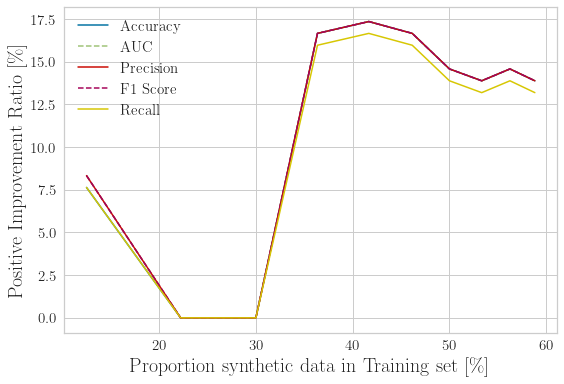

In [73]:
import preferencefig
fig,ax = plt.subplots()
ax.plot(x,100*np.array(y_acc),'-',label='Accuracy')
ax.plot(x,100*np.array(y_auc),'--',label='AUC')
ax.plot(x,100*np.array(y_prec),'-',label='Precision')
ax.plot(x,100*np.array(y_f1),'--',label='F1 Score')
ax.plot(x,100*np.array(y_r),'-',label='Recall')
ax.legend()
ax.set_xlabel('Proportion synthetic data in Training set [$\\%$]')
ax.set_ylabel('Positive Improvement Ratio [$\\%$]')
fig.savefig('../Results/Result_03/Figures/Grid_search_2.jpeg',dpi=250)

In [70]:
y_acc = [len(t_acc.loc[t_acc[i]>0])/len(t_acc) for i in list(t_acc.columns)[1:]]
y_auc = [len(t_auc.loc[t_auc[i]>0])/len(t_auc) for i in list(t_acc.columns)[1:]]
y_f1 = [len(t_f1.loc[t_f1[i]>0])/len(t_f1) for i in list(t_acc.columns)[1:]]
y_prec = [len(t_pr.loc[t_pr[i]>0])/len(t_pr) for i in list(t_acc.columns)[1:]]
y_r= [len(t_r.loc[t_r[i]>0])/len(t_r) for i in list(t_r.columns)[1:]]

In [56]:
print(len(t_acc.loc[t_acc['10%']>0]))
print(len(t_auc.loc[t_auc['10%']>0]))
print(len(t_pr.loc[t_pr['10%']>0]))
print(len(t_r.loc[t_r['10%']>0]))
print(len(t_f1.loc[t_f1['10%']>0]))

11
12
12
11
12


In [ ]:
j = np.arrange(1,10)
d = {'Data':'lala',[str(i)+'0%':j[i] for i in j]}

In [ ]:

f = open('../T_Data/'+list_data_imp.iloc[45]+'/Result.json') 
dict_result=json.load(f)
f.close()

Df = pd.DataFrame(eval(dict_result['Dataframe_0']))

In [ ]:
import preferencefig
fig,ax = plt.subplots()
ax.plot(x,100*t_acc.mean(),'-',label='Accuracy')
ax.plot(x,100*t_auc.mean(),'--',label='AUC')
ax.plot(x,100*t_pr.mean(),'-',label='Precision')
ax.plot(x,100*t_f1.mean(),'--',label='F1 Score')
ax.plot(x,100*t_r.mean(),'-',label='Recall')
ax.legend()
ax.set_xlabel('Proportion synthetic data in Training set [$\\%$]')
ax.set_ylabel('Mean Difference Performance [$\\%$]')
fig.savefig('../Results/Result_03/Figures/Grid_search.jpeg',dpi=250)
